In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import (
    mean_squared_error,
    r2_score,
    accuracy_score,
    confusion_matrix,
    precision_score,
    recall_score,
    silhouette_score
)

In [ ]:
df = pd.read_csv("/content/raw.data.csv")


In [ ]:
print("Dataset shape:", df.shape)

print("\nColumn data types:")
df.info()

print("\nFirst 5 rows:")
df.head()

Dataset shape: (297, 14)

Column data types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB

First 5 rows:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [ ]:
# Numeric columns → mean imputation
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())


# Categorical columns → mode imputation
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

print("Missing values after handling:")
df.isnull().sum()

Missing values after handling:


,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
df = pd.get_dummies(df, columns=categorical_cols)
print("Dataset shape after encoding:", df.shape)

Dataset shape after encoding: (297, 14)


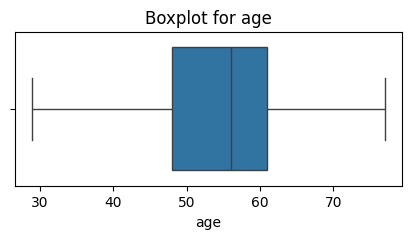

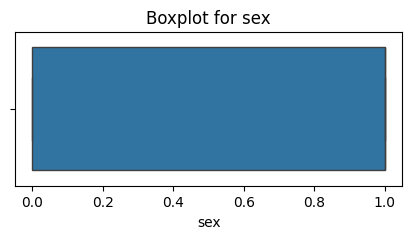

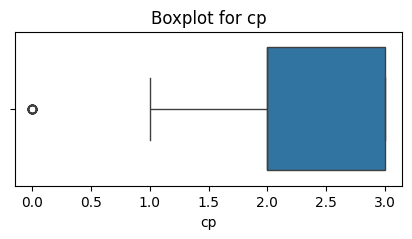

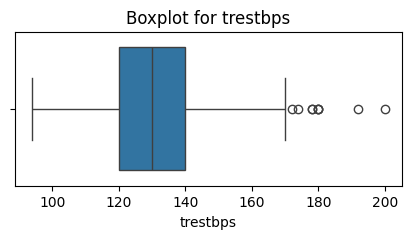

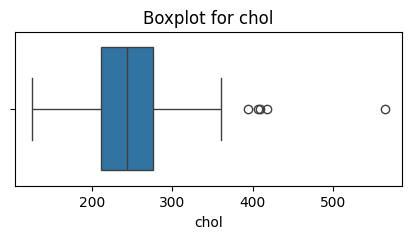

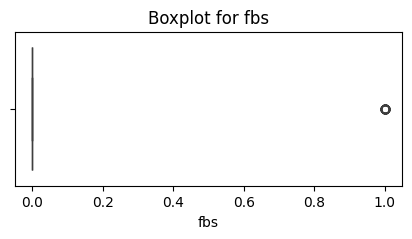

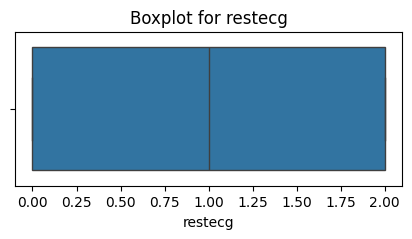

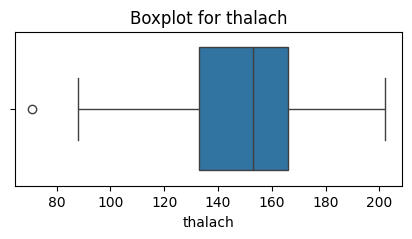

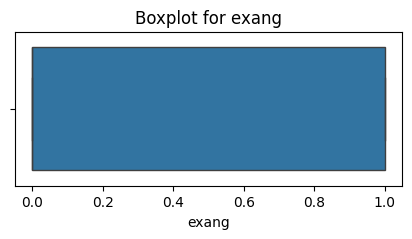

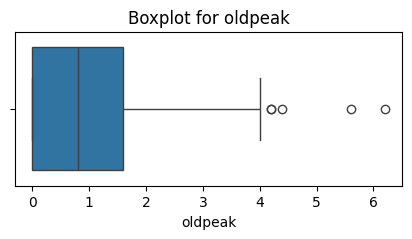

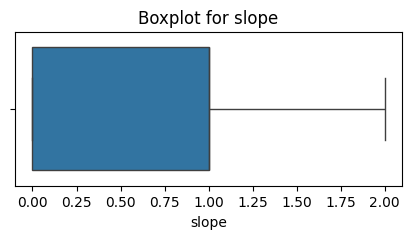

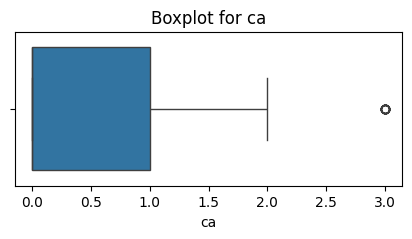

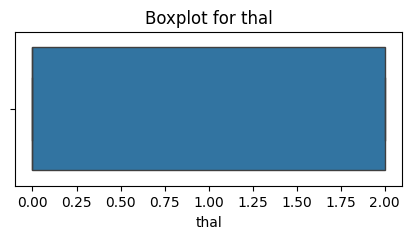

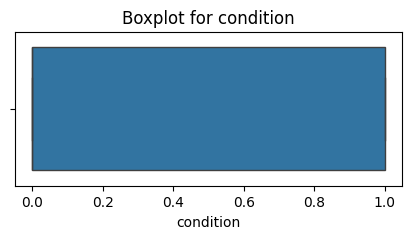

In [ ]:
for col in numeric_cols:
    plt.figure(figsize=(5,2))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [ ]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(
    scaler.fit_transform(df),
    columns=df.columns
)

In [ ]:
target_column = "condition"

X = df_scaled.drop(columns=[target_column])
y = df_scaled[target_column]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (237, 13)
Testing set size: (60, 13)


**Classification Task: Logistic Regression**

In [ ]:
#Target
X = df.drop("condition", axis=1)
y = df["condition"]

#Train / Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

#Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

#Prediction
y_pred = model.predict(X_test)

#Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7333333333333333


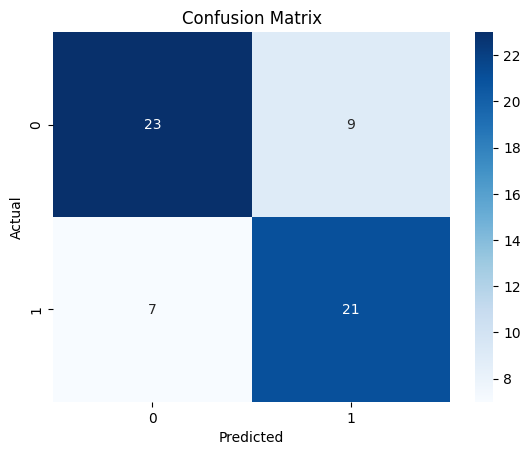

In [ ]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
#Precision and Recall
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))

Precision: 0.7
Recall: 0.75


**Clustering Task: K-Means Clustering**

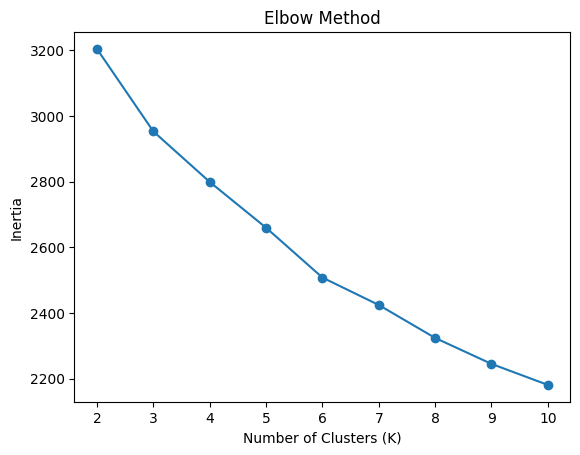

In [ ]:
#Prepare Data
X_cluster = df.drop("condition", axis=1)
X_cluster = scaler.fit_transform(X_cluster)  #Scaling

#Elbow Method
inertia = []

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_cluster)
    inertia.append(km.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.show()

In [ ]:
#Fit K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(X_cluster)

In [ ]:
#Silhouette Score
print("Silhouette Score:", silhouette_score(X_cluster, clusters))

Silhouette Score: 0.12434078699244303


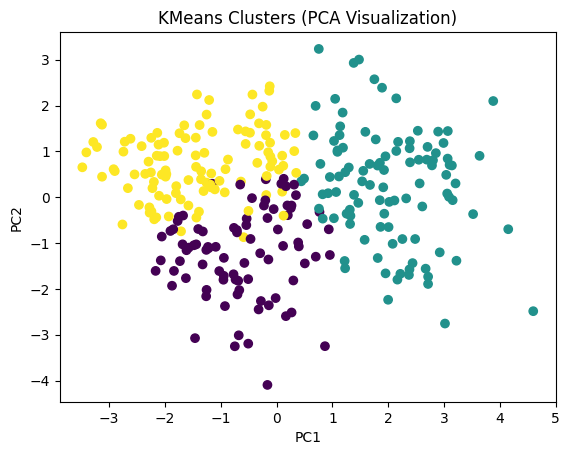

In [ ]:
#Visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_cluster)

plt.scatter(X_pca[:,0], X_pca[:,1], c=clusters)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("KMeans Clusters (PCA Visualization)")
plt.show()


**Regression Task: Linear Regression (Predicting a Continuous Value)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Features and target
X = df.drop('age', axis=1)
y = df['age']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
# Initialize the model
lr_model = LinearRegression()

# Train the model
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred = lr_model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse

59.35621478826611

In [ ]:
rmse = np.sqrt(mse)
rmse

np.float64(7.70429846178522)

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.29332230984681984